<a href="https://colab.research.google.com/github/codeByGaurish/ml-usecase/blob/main/ml_usecase_telco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split
# import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from xgboost import XGBClassifier

# import 'GridSearchCV'
from sklearn.model_selection import GridSearchCV

# import 'accuracy_score' r2_score
from sklearn.metrics import accuracy_score,r2_score, classification_report, confusion_matrix

# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
pd.__version__

'2.1.4'

# **Data Exploration : Understand the dataset structure, including number of rows, columns, and data types.**

In [4]:
df = pd.read_csv("/content/Telco-Customer-Churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)


   Observation

*   Number of rows - 7043
*   Number of column - 21



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation :           
*   apartm SeniorCitizen,tenure are integer other are objects
*   monthly changes  is float
*   other columns are string  
             

Putting summary of each column to understand the data better



*   customerID - can be used to identify a customer as total distinct value is equal to number of rows
*   gender	   - gender of the customer
*   SeniorCitizen - a customer is senior citizen or not
*   Partner - binary data value as yes or non-null defines if customer has partner or not
*  Dependents - binary data value as yes or non-null tells us if customer has dependents or not
* tenure -  has continuos integer values not sure if thats year
* PhoneService - binary data value as yes or non-null tells us if customer has PhoneService or not
* MultipleLines - categorical feature with 3 category
* InternetService - categorical feature with 3 category
* OnlineSecurity - categorical feature with 3 category
* OnlineBackup - categorical feature with 3 category
* DeviceProtection - categorical feature with 3 category
* TechSupport - categorical feature with 3 category
* StreamingTV - categorical feature with 3 category
* StreamingMovies - categorical feature with 3 category
* Contract - categorical feature with 3 category
* PaperlessBilling - tells us if paperless billing is opted or not
* PaymentMethod - payment method
* MonthlyCharges - monthly charges
* TotalCharges - as per service total charges
* Churn - target variable as yes/no



In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **Missing Value analaysis and handling **

In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Observation : no null values found



target variable is Churn and most of the customer has values as No

<Axes: xlabel='Churn'>

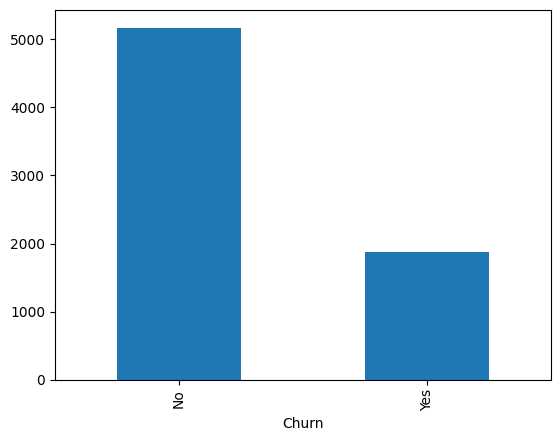

In [10]:
df["Churn"].value_counts().plot.bar()

# Single Feature Analysis / Univrient Analysis & target relationshop analysis

Text(0, 0.5, 'Count')

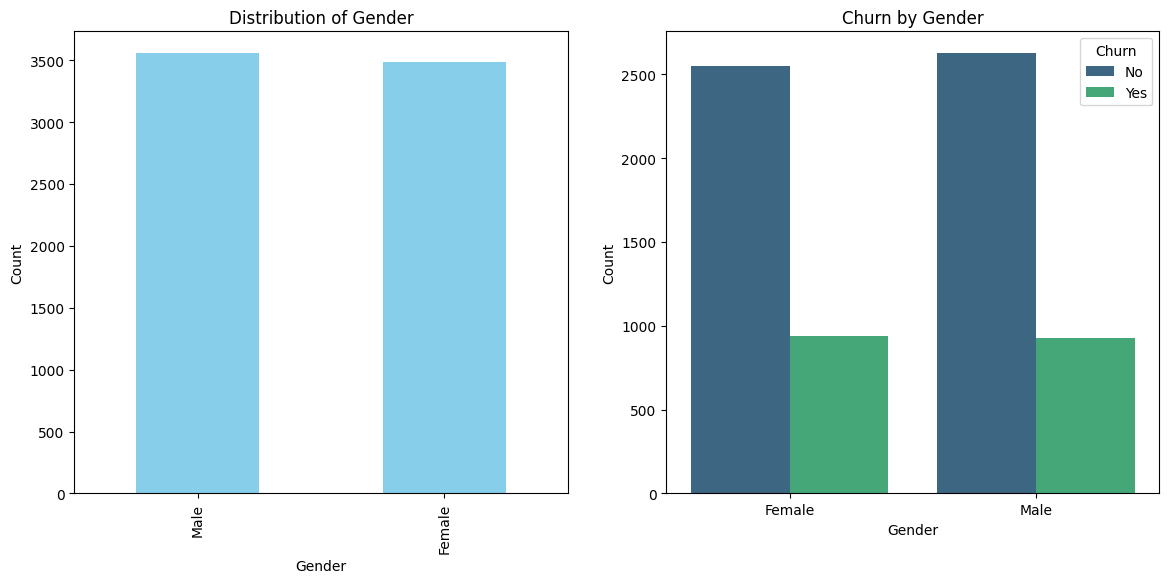

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['gender'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='gender', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

Observation -

Gender distribution are not having much deviation in the data, Also with target variable both cant see major trends.

Text(0, 0.5, 'Count')

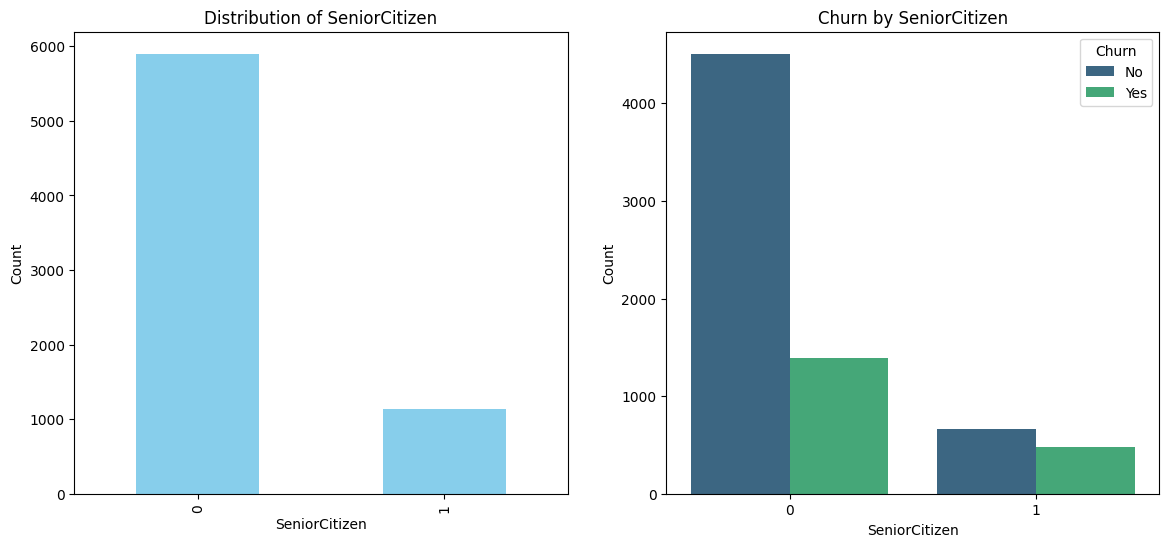

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['SeniorCitizen'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of SeniorCitizen')
axes[0].set_xlabel('SeniorCitizen')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by SeniorCitizen')
axes[1].set_xlabel('SeniorCitizen')
axes[1].set_ylabel('Count')

Observation -

SeniorCitizen: If the customer is a senior citizen (1) or not (0).

More customer are not senior citizen also if we see the relationship with the churn we can notice that customer who are not senior citizen are not cancelling there services.

Text(0, 0.5, 'Count')

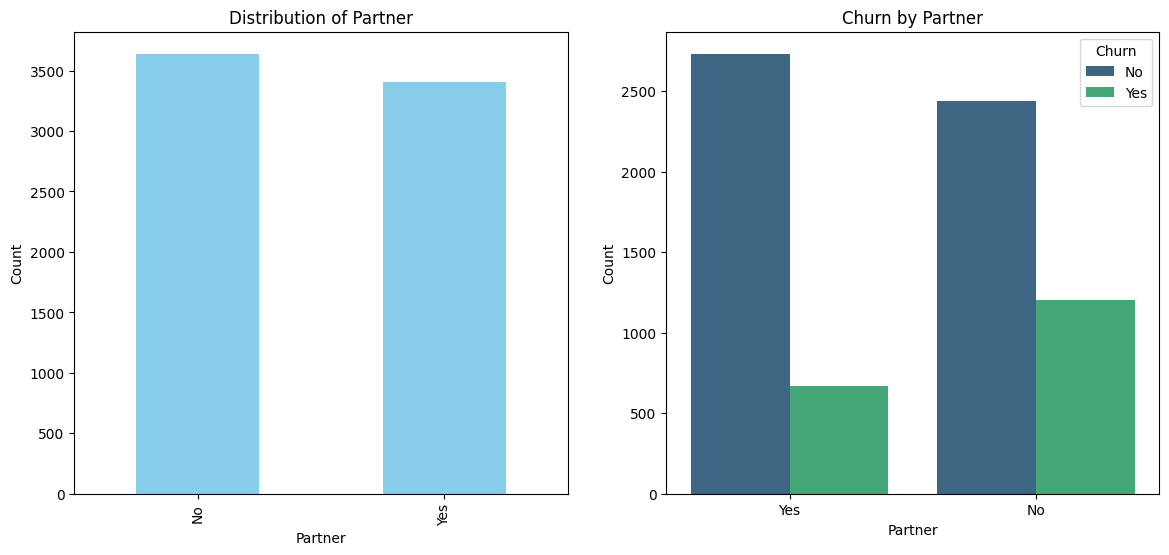

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['Partner'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Partner')
axes[0].set_xlabel('Partner')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by Partner')
axes[1].set_xlabel('Partner')
axes[1].set_ylabel('Count')

Observation -

Dont see major trends in feature distribution both with partner or without partner are not much deviating.

can see a trend customer with no partner are more likely to cancel the services then customer with partner.



Text(0, 0.5, 'Count')

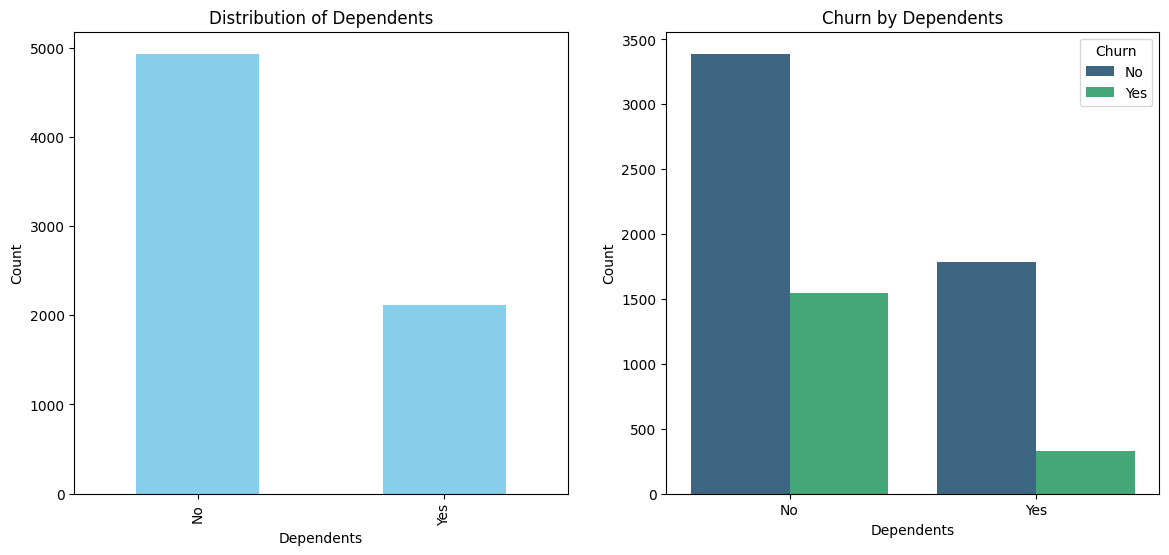

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['Dependents'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Dependents')
axes[0].set_xlabel('Dependents')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by Dependents')
axes[1].set_xlabel('Dependents')
axes[1].set_ylabel('Count')

Observation -

Dependents - binary data value as yes or non-null tells us if customer has dependents or not

can see trends where more customer belongs to category which doesnt have any dependents.

churn by dependents -

rate to cancelling services are more with customer with no dependents and less in customer with dependents


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['Dependents'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Dependents')
axes[0].set_xlabel('Dependents')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by Dependents')
axes[1].set_xlabel('Dependents')
axes[1].set_ylabel('Count')

Text(0, 0.5, 'Count')

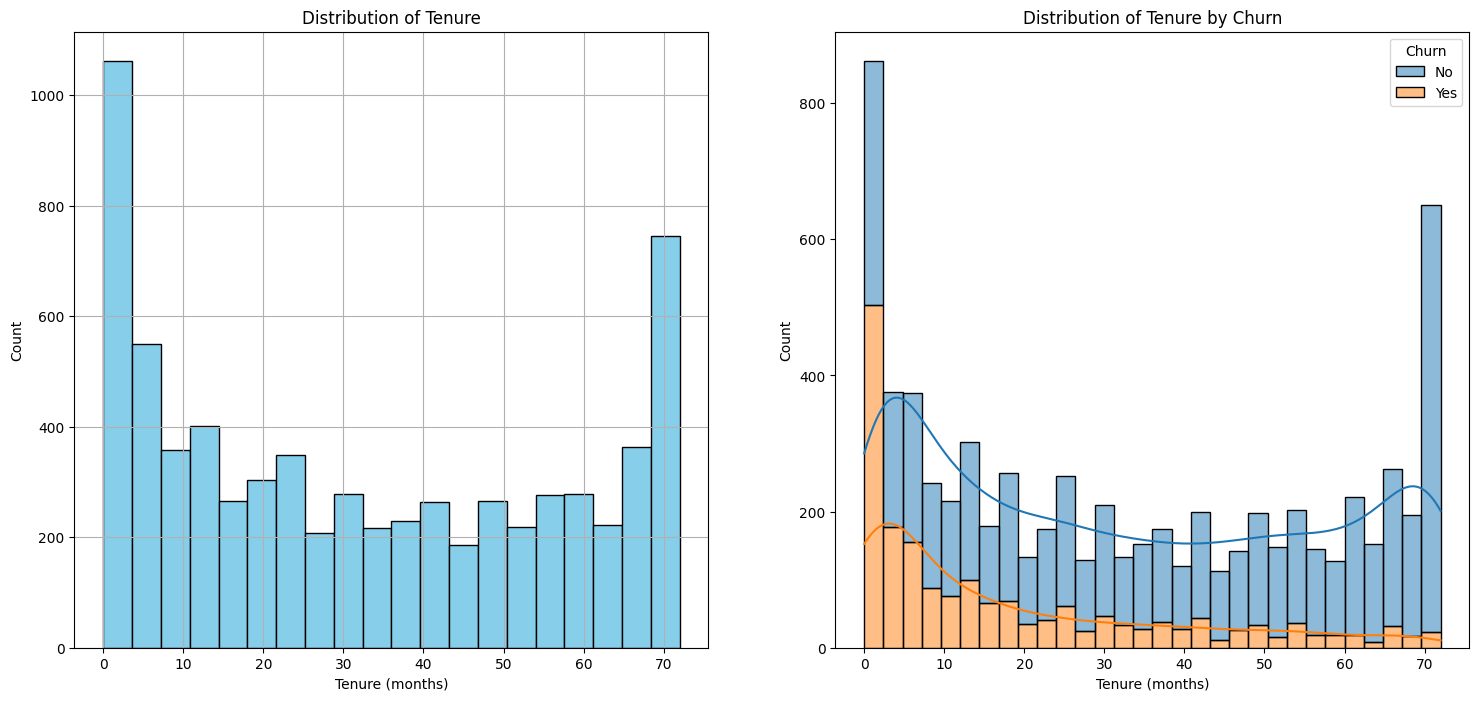

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# First plot: Histogram for tenure distribution
df['tenure'].hist(ax=axes[0], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Tenure')
axes[0].set_xlabel('Tenure (months)')
axes[0].set_ylabel('Count')

# Second plot: Histogram for tenure distribution by Churn with KDE
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple='stack', bins=30, ax=axes[1])
axes[1].set_title('Distribution of Tenure by Churn')
axes[1].set_xlabel('Tenure (months)')
axes[1].set_ylabel('Count')
#axes[1].legend(title='Churn', loc='upper right')

Obeservation -

Most of the customer are prefering lower tenure for subscription.

Clearly there is a trend where customer with lower tenure are more likely to cancel the services


Text(0, 0.5, 'Count')

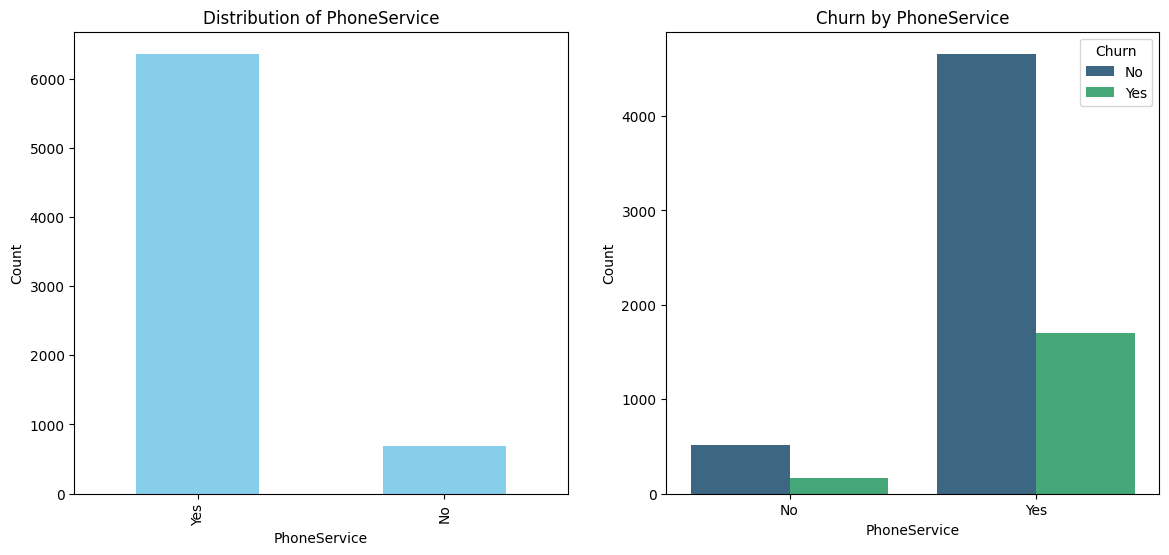

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['PhoneService'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of PhoneService')
axes[0].set_xlabel('PhoneService')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='PhoneService', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by PhoneService')
axes[1].set_xlabel('PhoneService')
axes[1].set_ylabel('Count')

Observation -

I dont see major trends to be indentified here because most of the customer have subscription of phoneService and not much of trend i can analyse with churn .

Text(0, 0.5, 'Count')

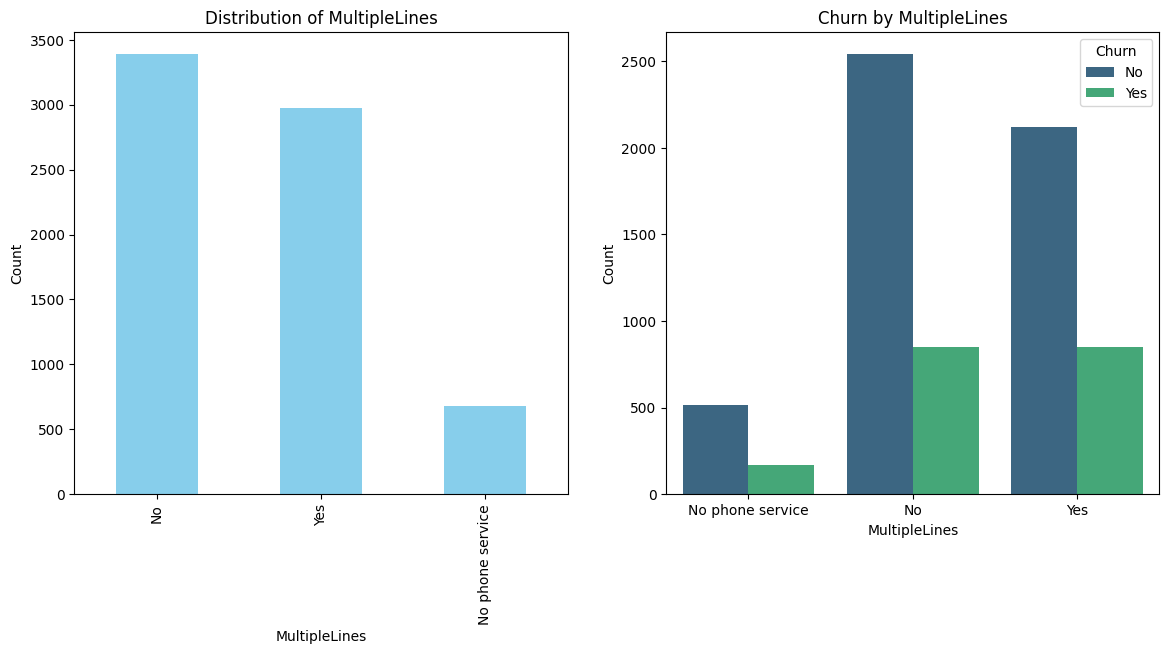

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['MultipleLines'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of MultipleLines')
axes[0].set_xlabel('MultipleLines')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='MultipleLines', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by MultipleLines')
axes[1].set_xlabel('MultipleLines')
axes[1].set_ylabel('Count')

Observation -

Unable to see any trends here

Text(0, 0.5, 'Count')

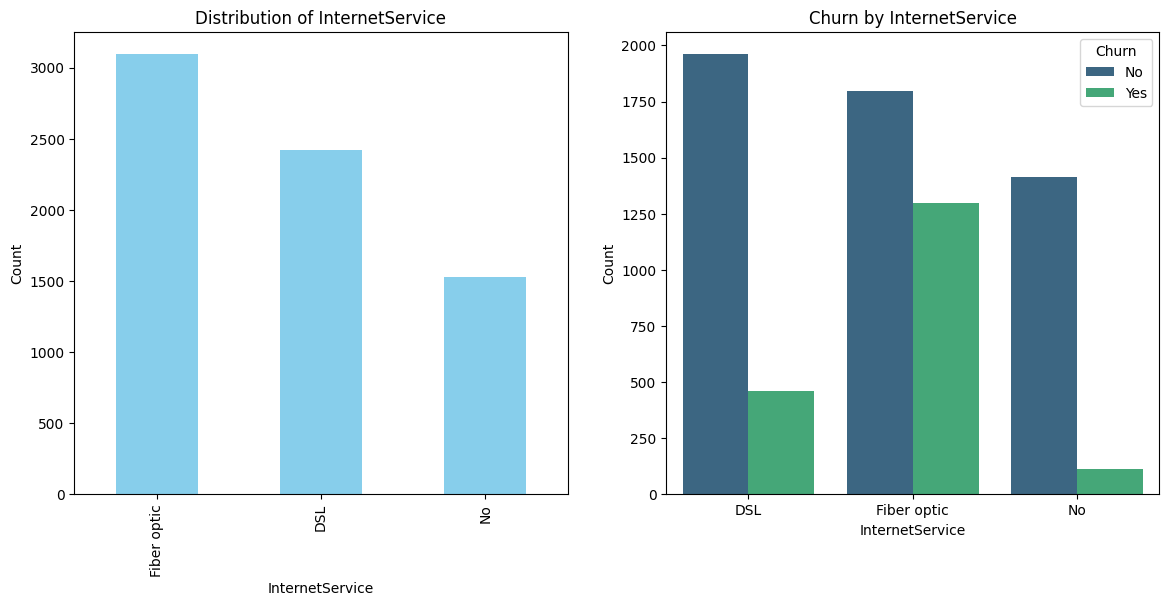

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['InternetService'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of InternetService')
axes[0].set_xlabel('InternetService')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='InternetService', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by InternetService')
axes[1].set_xlabel('InternetService')
axes[1].set_ylabel('Count')

Observcation -

Most of the customer are prefering either fiber optics for internet service but customer with DSL service are less likely to cancel the subscription.


Text(0, 0.5, 'Count')

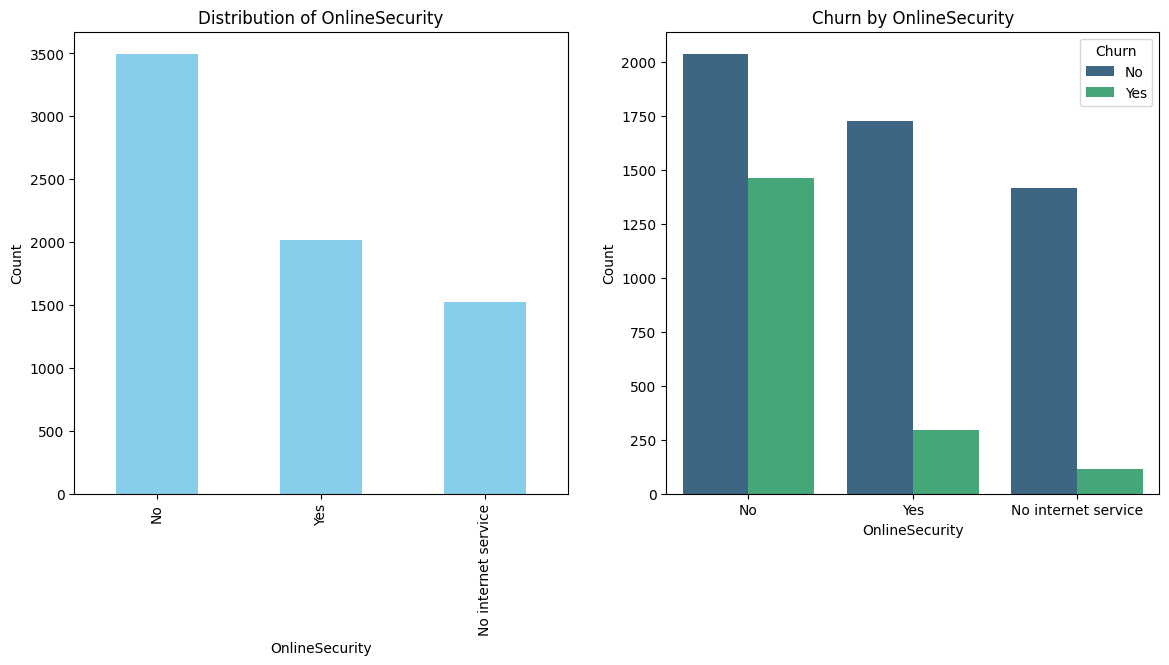

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['OnlineSecurity'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of OnlineSecurity')
axes[0].set_xlabel('OnlineSecurity')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by OnlineSecurity')
axes[1].set_xlabel('OnlineSecurity')
axes[1].set_ylabel('Count')

observation -


almost 50% customer doesnt opt for onlne security and more likely to churn .

almost 28.5 % customer opted for online security and less likely to churn.
almor 21.5 % customer not having any services

Text(0, 0.5, 'Count')

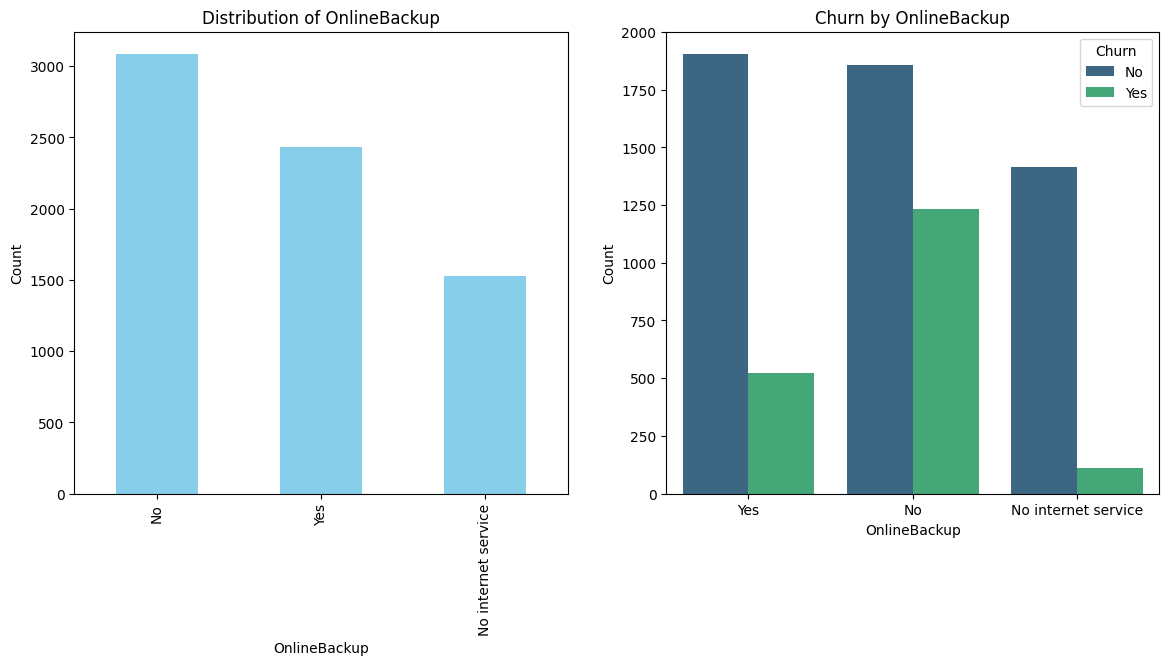

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['OnlineBackup'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of OnlineBackup')
axes[0].set_xlabel('OnlineBackup')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='OnlineBackup', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by OnlineBackup')
axes[1].set_xlabel('OnlineBackup')
axes[1].set_ylabel('Count')

observation -

customer who has opted for online back are less likely to churn

Text(0, 0.5, 'Count')

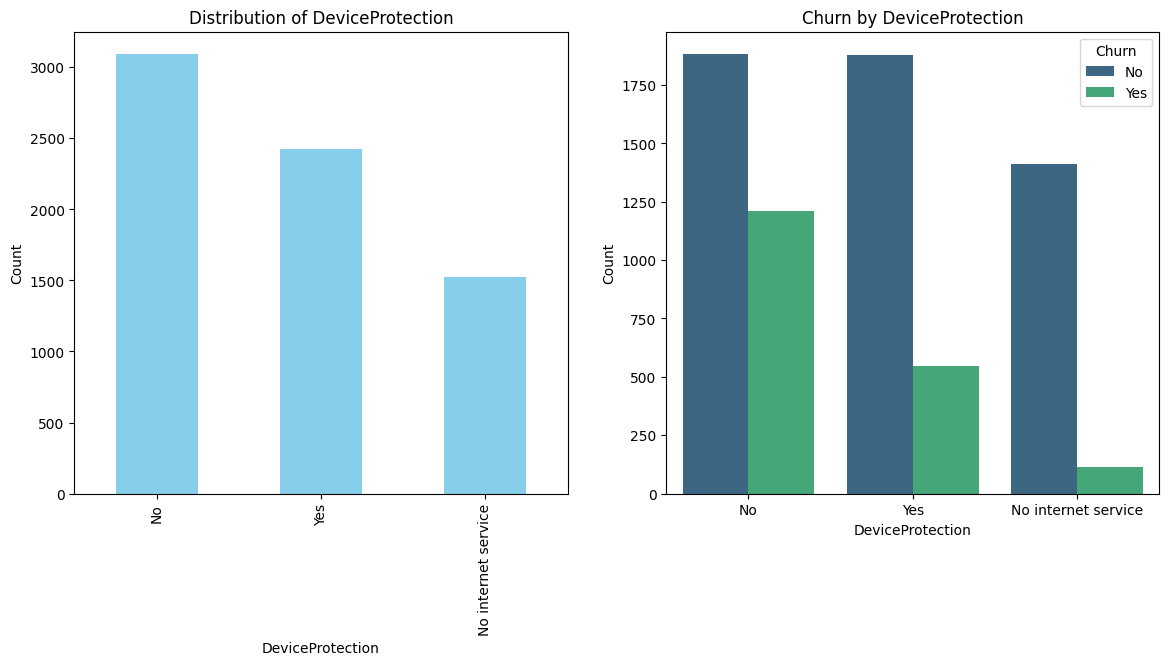

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['DeviceProtection'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of DeviceProtection')
axes[0].set_xlabel('DeviceProtection')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='DeviceProtection', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by DeviceProtection')
axes[1].set_xlabel('DeviceProtection')
axes[1].set_ylabel('Count')

observation -

unable to see any trend here.

Text(0, 0.5, 'Count')

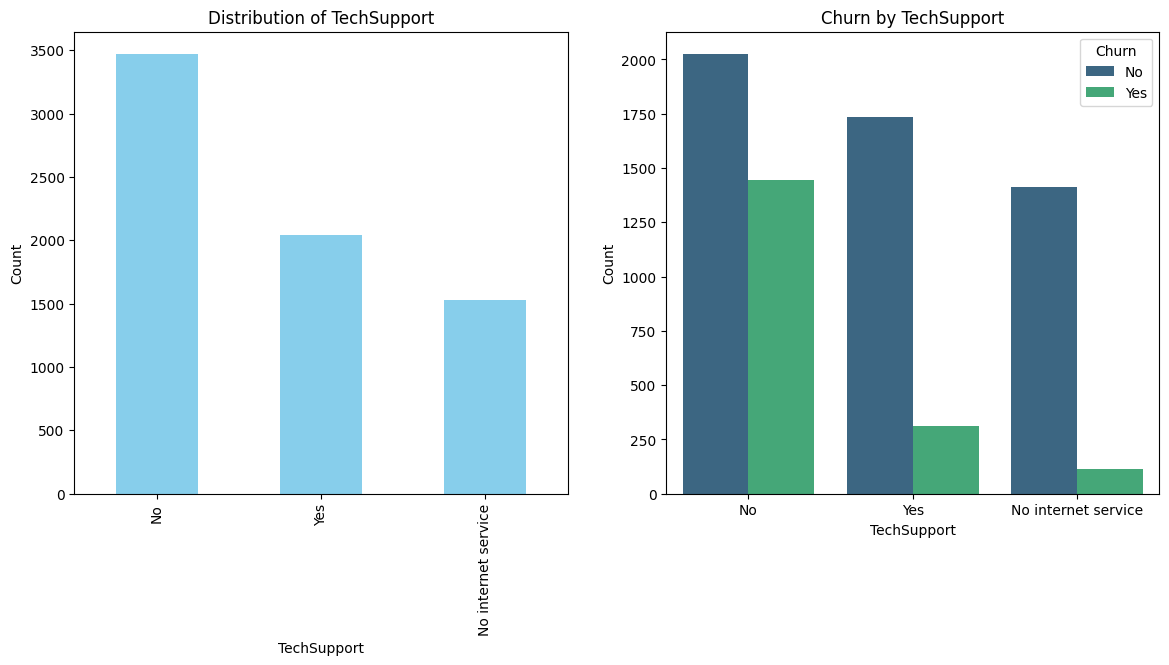

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['TechSupport'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of TechSupport')
axes[0].set_xlabel('TechSupport')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='TechSupport', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by TechSupport')
axes[1].set_xlabel('TechSupport')
axes[1].set_ylabel('Count')

observation -

customer who has opted for techsupport are less likely to churn and 50% customer are not opted for techsupport.
unabling more communicaton to tech support can help less churing .

Text(0, 0.5, 'Count')

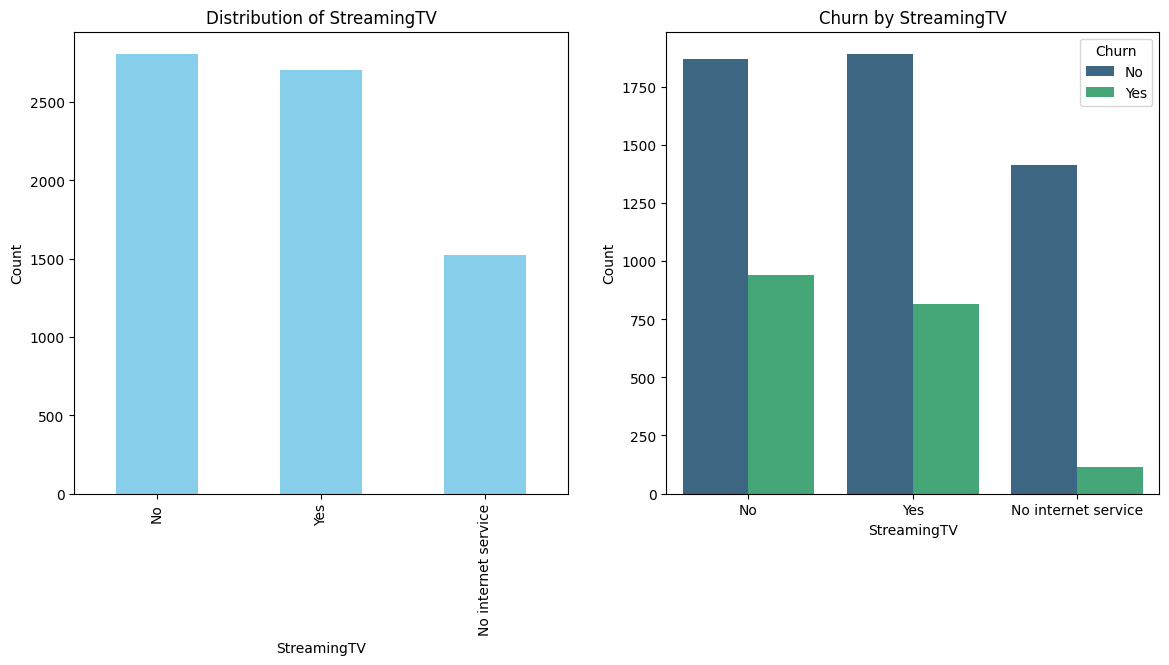

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['StreamingTV'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of StreamingTV')
axes[0].set_xlabel('StreamingTV')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='StreamingTV', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by StreamingTV')
axes[1].set_xlabel('StreamingTV')
axes[1].set_ylabel('Count')

observation -

No trend for streamingTV feature

Text(0, 0.5, 'Count')

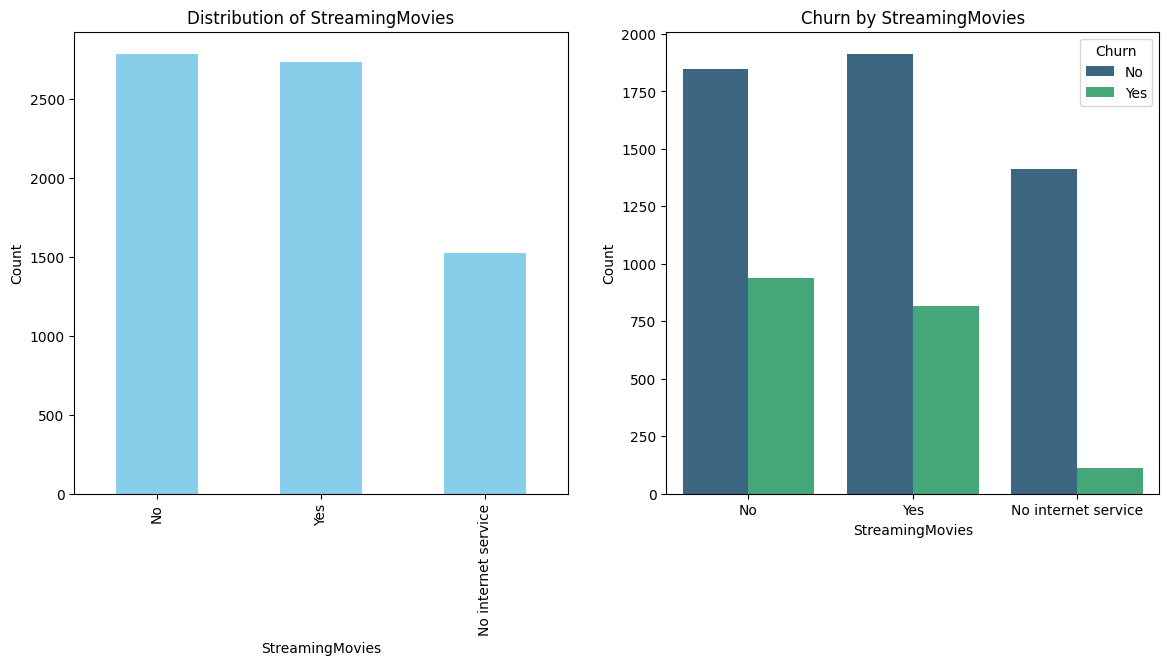

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['StreamingMovies'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of StreamingMovies')
axes[0].set_xlabel('StreamingMovies')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='StreamingMovies', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by StreamingMovies')
axes[1].set_xlabel('StreamingMovies')
axes[1].set_ylabel('Count')

observation -

No trend for streamingMovies feature

Text(0, 0.5, 'Count')

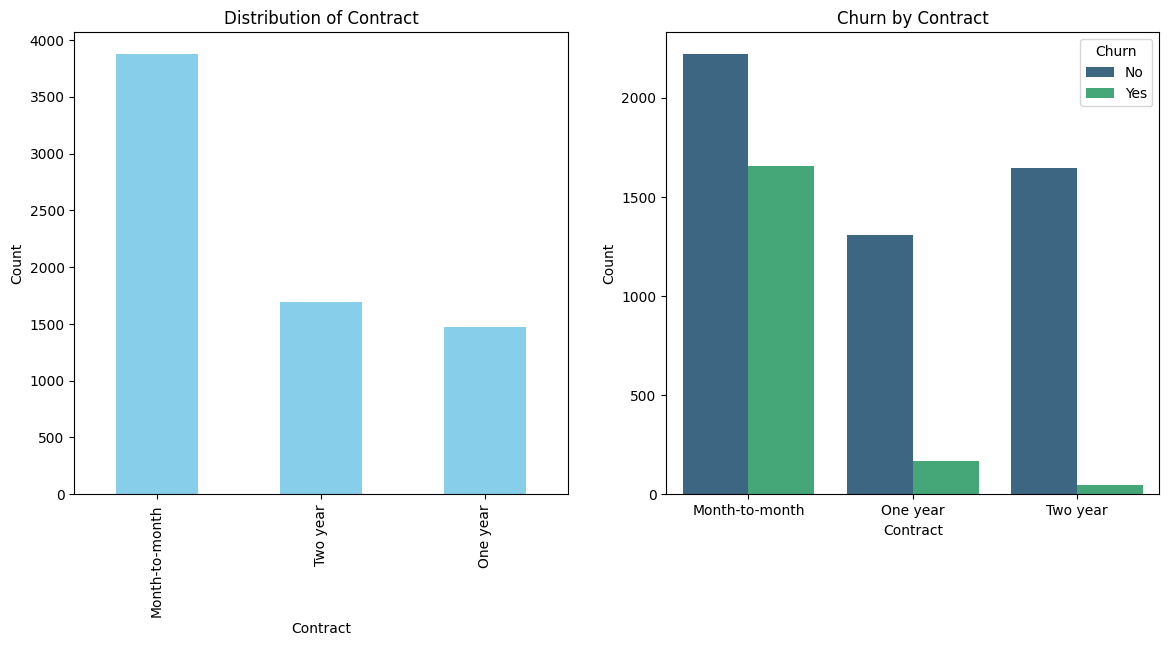

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['Contract'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Contract')
axes[0].set_xlabel('Contract')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by Contract')
axes[1].set_xlabel('Contract')
axes[1].set_ylabel('Count')

obervation -

~50% customer are opted month to month subscription .
- Customer are more likely to churn if subcripted on month-to-month contract.
- Longer the period of contact less likely for customer to churn.

Text(0, 0.5, 'Count')

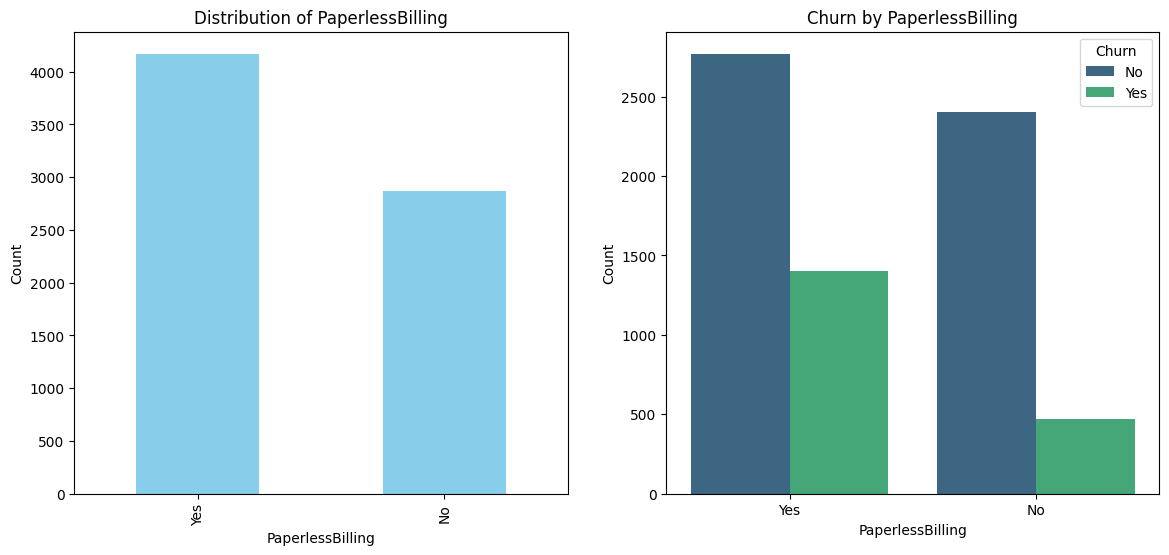

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['PaperlessBilling'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of PaperlessBilling')
axes[0].set_xlabel('PaperlessBilling')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='PaperlessBilling', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by PaperlessBilling')
axes[1].set_xlabel('PaperlessBilling')
axes[1].set_ylabel('Count')

Observation -

~60% customer opted for paperlessbilling but more likely to churn.

~40% customer opted for paperlessbilling but less likely to churn.

Text(0, 0.5, 'Count')

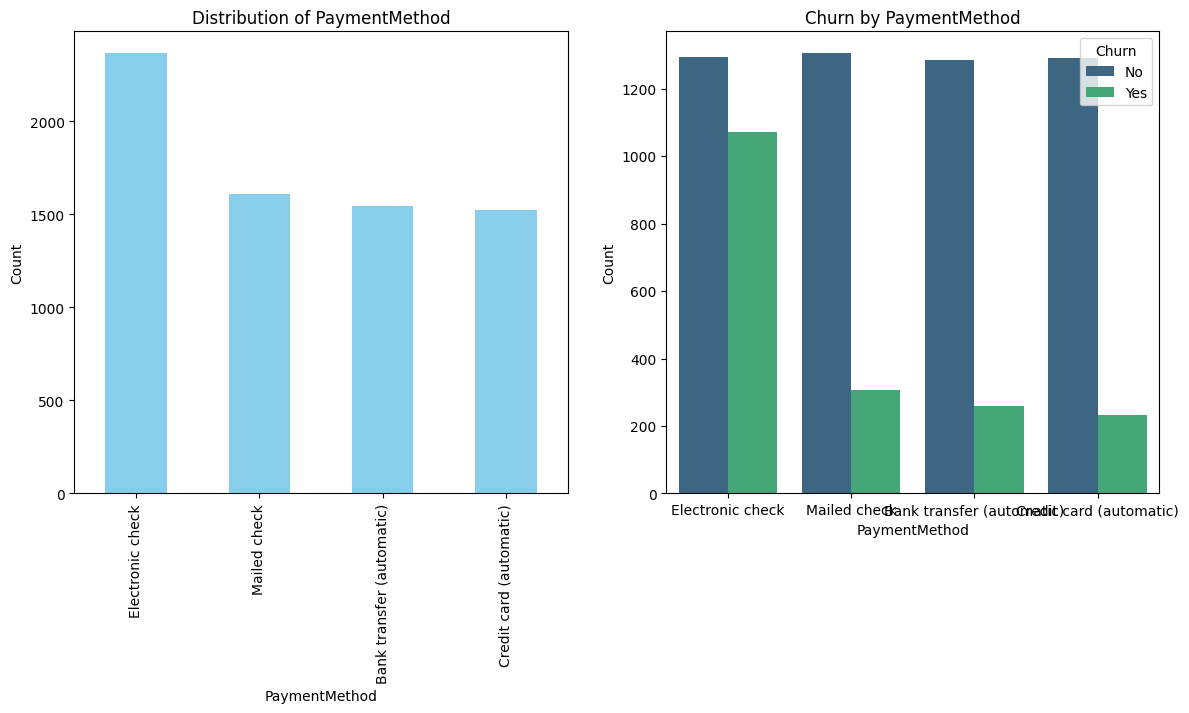

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Bar plot for gender distribution
df['PaymentMethod'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of PaymentMethod')
axes[0].set_xlabel('PaymentMethod')
axes[0].set_ylabel('Count')

# Second plot: Count plot for churn by gender
sns.countplot(x='PaymentMethod', hue='Churn', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Churn by PaymentMethod')
axes[1].set_xlabel('PaymentMethod')
axes[1].set_ylabel('Count')

Observation  -

More customer are opting for electronic check method of payment.
dont see any trend in with churn relationship.


outlers handling

In [7]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Identifying outliers in 'MonthlyCharges'
monthly_charges_outliers, mc_lower_bound, mc_upper_bound = identify_outliers(df, 'MonthlyCharges')

# Identifying outliers in 'tenure'
tenure_outliers, tenure_lower_bound, tenure_upper_bound = identify_outliers(df, 'tenure')

# Display the results
monthly_charges_outliers_count = len(monthly_charges_outliers)
tenure_outliers_count = len(tenure_outliers)

monthly_charges_outliers_count, mc_lower_bound, mc_upper_bound, tenure_outliers_count, tenure_lower_bound, tenure_upper_bound

(0, -46.02499999999999, 171.375, 0, -60.0, 124.0)

MonthlyCharges:

    0: The number of outliers identified in the MonthlyCharges column.
    -46.025: The lower bound for MonthlyCharges calculated using the IQR method.
    171.375: The upper bound for MonthlyCharges calculated using the IQR method.

tenure:

    0: The number of outliers identified in the tenure column.
    -60.0: The lower bound for tenure calculated using the IQR method.
    124.0: The upper bound for tenure calculated using the IQR method.

In [9]:
df['TotalCharges'].unique()


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

# DATA CLEANING

In [11]:
# Deleting columns because totalcharges contains bad data and cutomerid is unique through each row which has no meaningful data`
df.drop(['customerID', 'TotalCharges'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [12]:
# rechecking for null data
blank_data = df.isnull().sum()
print("Blank data by column:")
print(blank_data)

Blank data by column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64


In [14]:
from sklearn.preprocessing import LabelEncoder

# Creating the Label encoder
Label_pre = LabelEncoder()
data_cols=df.select_dtypes(exclude=['int','float']).columns
label_col =list(data_cols)

# Applying encoder
df[label_col]= df[label_col].apply(lambda col:Label_pre.fit_transform(col))

# Saved dataset with Label Encoder
df.to_csv("dataset_LabelEncoder.csv")

# Viewing
Label_pre

LabelEncoder()

In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [15]:
# Split the data into features (X) and target (y)
X = df.drop("Churn", axis=1) # Drop the target column to get the features
y = df["Churn"] # Set the target column

 Model training and testing

In [17]:
 # Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize training data
print("Rows and columns of training data X_train:", x_train.shape)
print("Rows and columns of training data y_train:", x_train.shape)

Rows and columns of training data X_train: (5634, 20)
Rows and columns of training data y_train: (5634, 20)


In [18]:
    lr = LogisticRegression()

In [19]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = lr.predict(x_test)

In [21]:
print('accuracy score ',accuracy_score(y_test, y_pred))

accuracy score  0.8026969481902059


Text(0.5, 1.0, 'Diffrence in actual and test result')

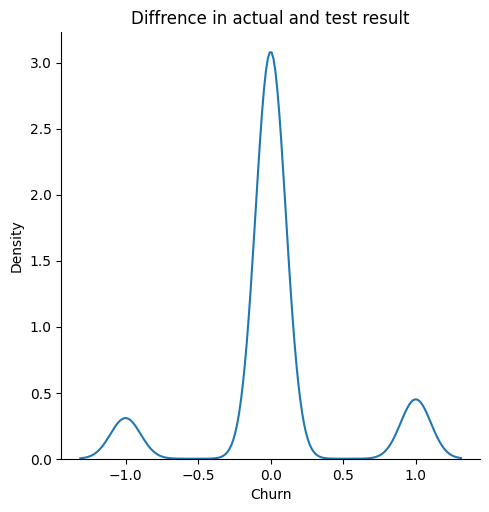

In [22]:
sns.displot(y_test-y_pred,kind='kde')
plt.title('Diffrence in actual and test result')

In [23]:
cm = confusion_matrix(y_test,y_pred)

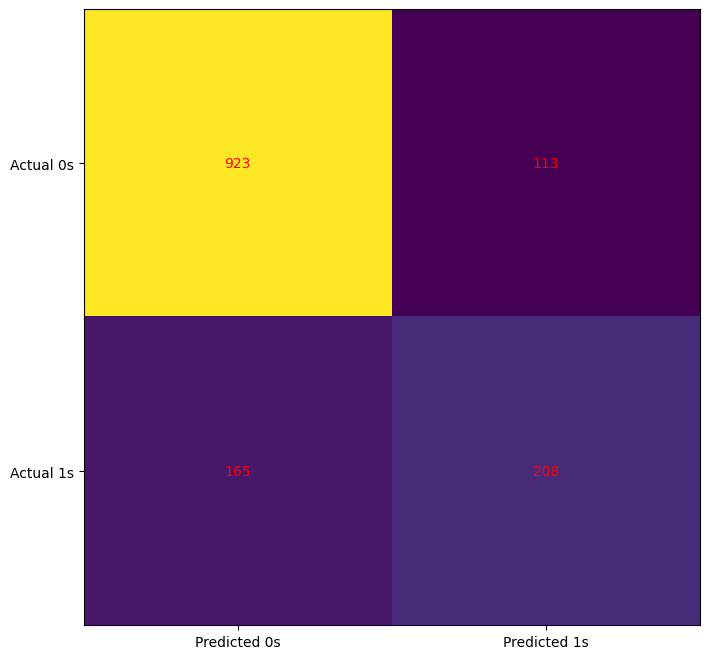

In [24]:
def confusion_matrix_plot(cm):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()


confusion_matrix_plot(cm)

# Logistic Regression hyperparameter tuning

In [27]:
y_pred = lr.predict(x_test)

In [29]:
#training model
parameters = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40],
             'max_iter':[100,200,300]}

In [30]:
# hyperparameter tuning
classifier = GridSearchCV(classifier,param_grid=parameters,scoring='accuracy',cv=5)

In [31]:
# testing model

classifier.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=10.0, random_state=0,
                                          solver='liblinear'),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [32]:
print(classifier.best_params_)

{'C': 40, 'max_iter': 100, 'penalty': 'l1'}


In [33]:
##predication
y_pred = classifier.predict(x_test)

In [34]:
print('accuracy score ',accuracy_score(y_test, y_pred))

accuracy score  0.8147622427253371


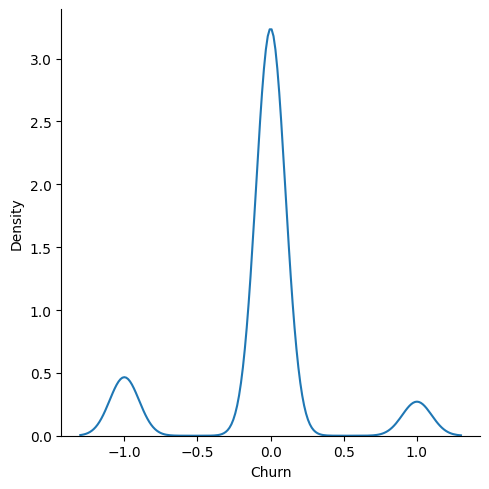

In [35]:
#plotting displot
sns.displot(y_pred-y_test,kind='kde')

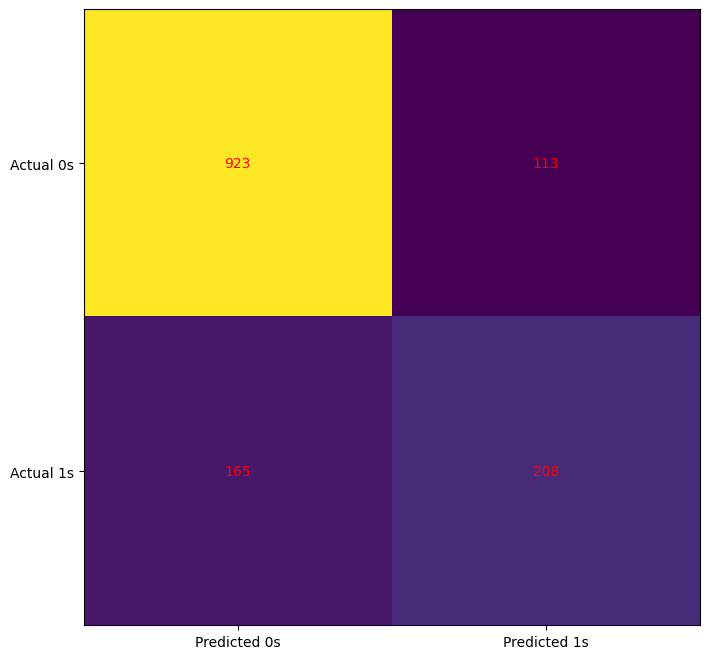

In [36]:
confusion_matrix_plot(cm)


# Random Forest Classifier model with default parameters

In [37]:
rfc = RandomForestClassifier(random_state=0)

In [38]:
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [39]:
y_pred = rfc.predict(x_test)

In [40]:
cm = confusion_matrix(y_test,y_pred)

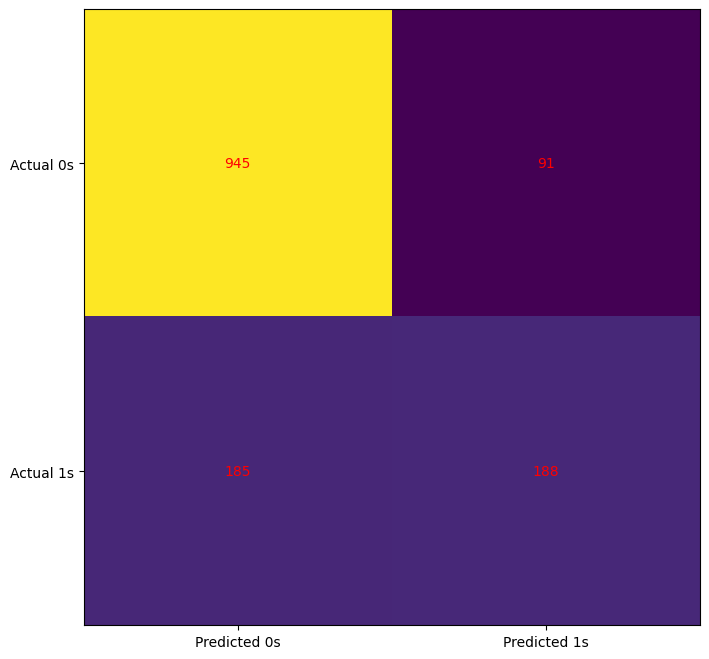

In [41]:
confusion_matrix_plot(cm)

# Random Forest Classifier model with parameter n_estimators=100

In [43]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

In [44]:
# training model

rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [45]:
# testing model
accuracy_score(y_test, y_pred)

0.8041163946061036

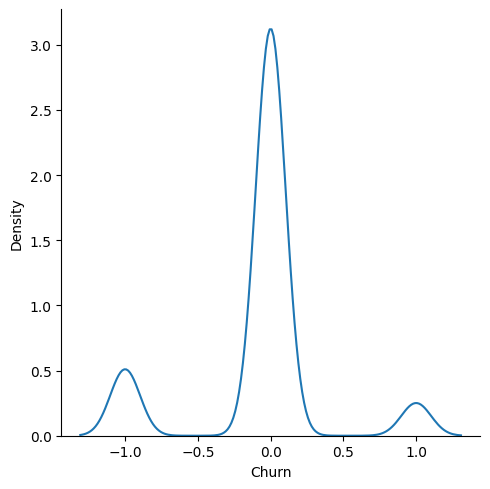

In [46]:
#plotting displot
sns.displot(y_pred-y_test,kind='kde')

In [47]:
cm = confusion_matrix(y_test,y_pred)

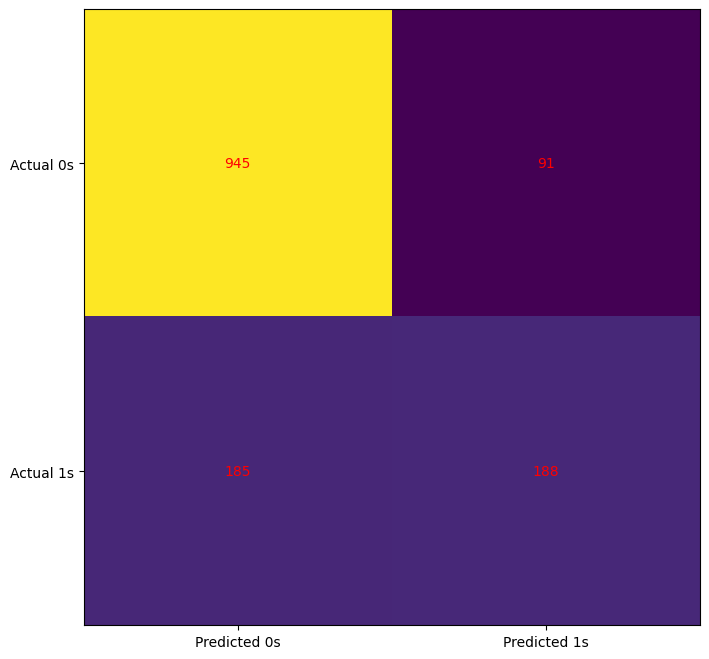

In [48]:
confusion_matrix_plot(cm)

# Finding important features with Random Forest model

<Axes: xlabel='None', ylabel='None'>

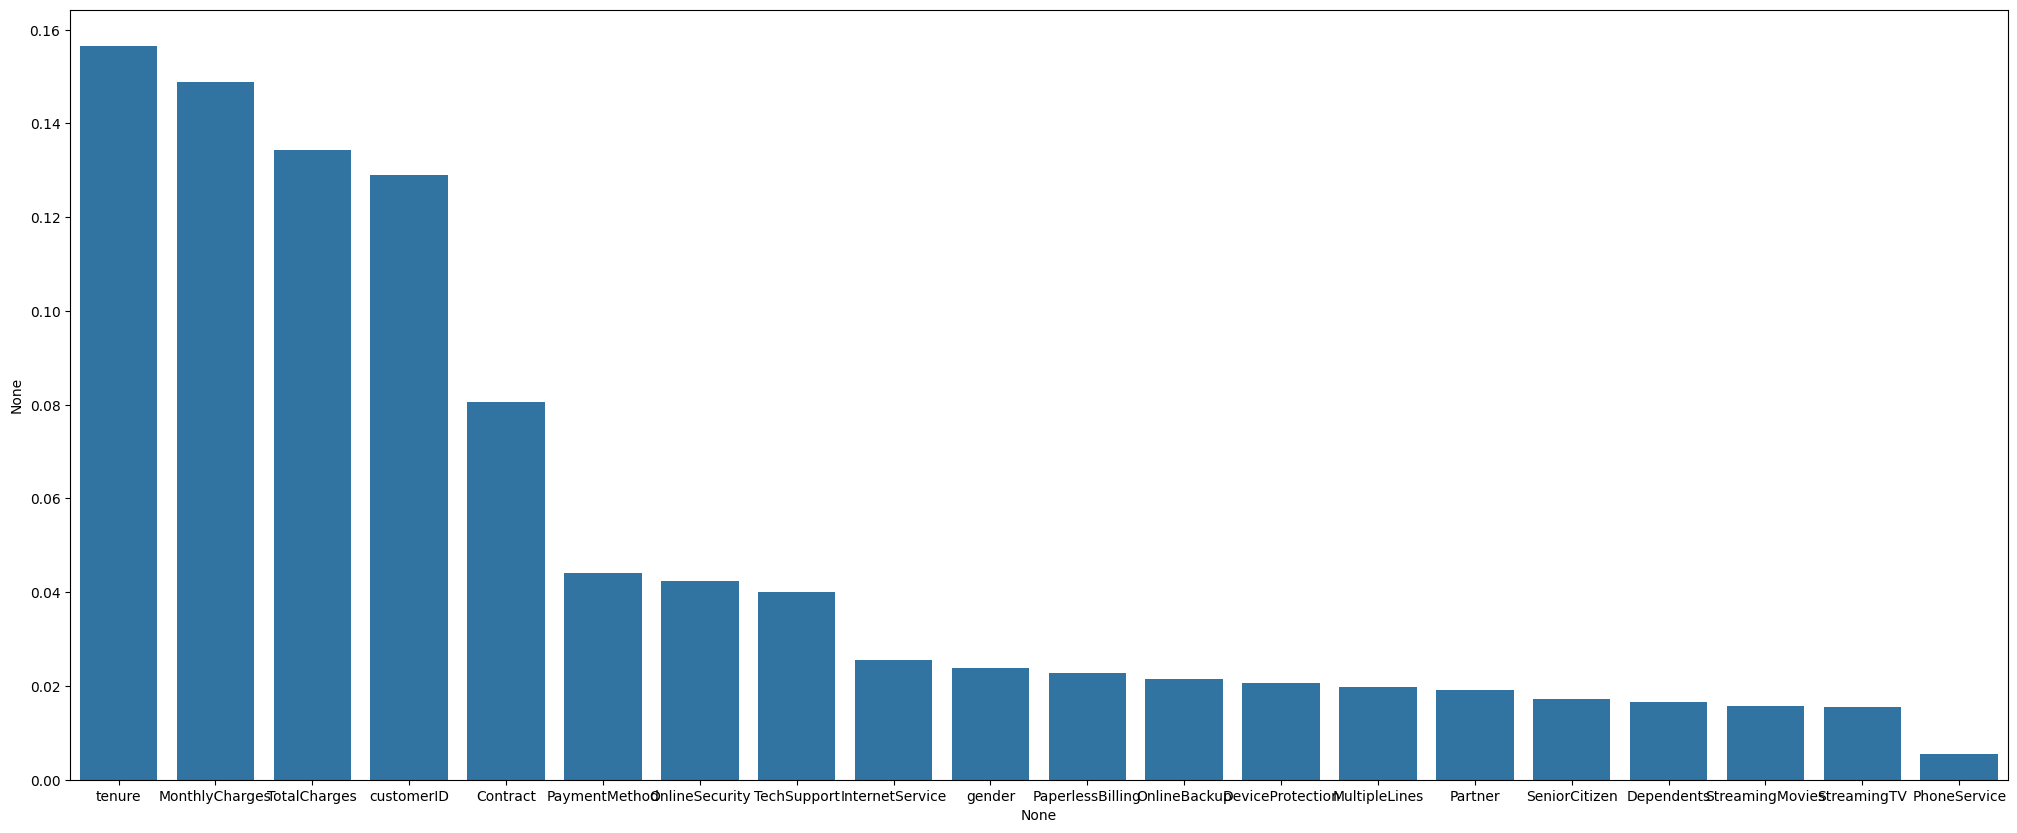

In [55]:
feature_scores = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)
plt.figure(figsize=(25,10))
sns.barplot(y=feature_scores,x=feature_scores.index)

XG BOOST implementatio

In [56]:
xg= XGBClassifier()

In [57]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
y_pred = xg.predict(x_test)

In [59]:
accuracy_score(y_test, y_pred)

0.7892122072391767

In [60]:
cm = confusion_matrix(y_test,y_pred)

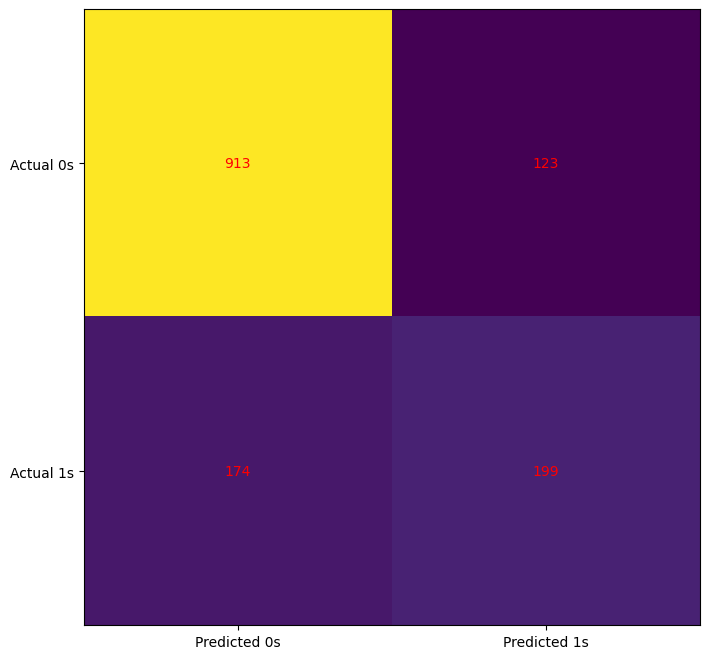

In [61]:
confusion_matrix_plot(cm)

In [ ]:
accurracyscore = [0.8415841584158416,0.7557755775577558,0.8679867986798679]
name = ['Logistic Regression','Decision Tree','Random Forest ']

# XG boost Hyperparameter tuning


In [62]:
xgb = XGBClassifier(objective='binary:logistic')

In [67]:
param_grid = {
    'learning_rate': [0.01],
    'n_estimators': [200],
    'max_depth': [3],
    'min_child_weight': [ 3],
    'subsample': [0.9, 1],
    'colsample_bytree': [ 0.9],
    'gamma': [0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

In [68]:
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [69]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.9], 'gamma': [0.1, 0.2],
                         'learning_rate': [0.01], 'max_depth': [3],
                         'min_child_weight': [3], 'n_estimators': [200],
                         'reg_alpha': [0, 0.1, 0.5], 'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.9, 1]},
             verbose=2)

In [70]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1}


In [71]:
best_model = grid_search.best_estimator_

In [72]:
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)

In [73]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [75]:
print("tain accuracy  : ", train_accuracy)
print("test accuracy  : ", test_accuracy )

tain accuracy  :  0.7999645012424565
test accuracy  :  0.7977288857345636
